<a href="https://colab.research.google.com/github/JuanCaBocaletti/TMIR_Proyecto_Final/blob/main/Fruits_and_Vegetables_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar Kaggle para acceder al archivo .zip con la API

In [1]:
!pip install kaggle

### Montar el Google Drive, cargar API de Kaggle y cargar archivo

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Copiar el archivo kaggle.json a la ubicación correcta
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset de Kaggle
!kaggle datasets download -d muhriddinmuxiddinov/fruits-and-vegetables-dataset
!unzip fruits-and-vegetables-dataset.zip -d /content/fruits_and_vegetables

Streaming output truncated to the last 5000 lines.
  inflating: /content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (444).jpg  
  inflating: /content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (445).jpg  
  inflating: /content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (446).JPG  
  inflating: /content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (447).jpg  
  inflating: /content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (448).jpg  
  inflating: /content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (449).jpg  
  inflating: /content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (45).jpg  
  inflating: /content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Veget

### Verificación de directorios del Dataset



In [7]:
import os

# Listar directorios y archivos en la carpeta base
print("Contenido de la carpeta base:")
print(os.listdir('/content/fruits_and_vegetables'))

Contenido de la carpeta base:
['train', 'Fruits_Vegetables_Dataset(12000)', 'test']


In [8]:
# Listar archivos y directorios en 'Fruits_Vegetables_Dataset(12000)'
print("Contenido de 'Fruits_Vegetables_Dataset(12000)':")
print(os.listdir('/content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)'))

Contenido de 'Fruits_Vegetables_Dataset(12000)':
['Fruits', 'Vegetables']


In [12]:
import os

# Listar archivos y directorios en 'train'
print("Contenido de 'train':")
print(os.listdir('/content/fruits_and_vegetables/train'))

# Listar archivos y directorios en 'test'
print("Contenido de 'test':")
print(os.listdir('/content/fruits_and_vegetables/test'))

Contenido de 'train':
['Banana', 'Broccoli', 'Carrot', 'Pepper', 'Apple', 'Orange']
Contenido de 'test':
['Banana', 'Broccoli', 'Carrot', 'Pepper', 'Apple', 'Orange']


In [14]:
# Listar archivos en los directorios originales de frutas y verduras
print("Archivos en el directorio original de frutas:")
print(os.listdir('/content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Fruits'))

print("Archivos en el directorio original de verduras:")
print(os.listdir('/content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)/Vegetables'))

Archivos en el directorio original de frutas:
['RottenOrange', 'RottenBanana', 'RottenStrawberry', 'RottenMango', 'FreshMango', 'FreshStrawberry', 'FreshBanana', 'RottenApple', 'FreshOrange', 'FreshApple']
Archivos en el directorio original de verduras:
['RottenPotato', 'RottenTomato', 'FreshTomato', 'FreshBellpepper', 'FreshCarrot', 'FreshPotato', 'RottenBellpepper', 'RottenCucumber', 'RottenCarrot', 'FreshCucumber']


### Selección de imágenes de Frutas y Verduras

In [22]:
import os
import shutil

# Directorios base
base_dir = '/content/fruits_and_vegetables/Fruits_Vegetables_Dataset(12000)'
train_dir = '/content/fruits_and_vegetables/train'
test_dir = '/content/fruits_and_vegetables/test'

# Crear directorios para frutas y verduras seleccionadas
selected_classes = {
    'Apple': 'FreshApple',
    'Banana': 'FreshBanana',
    'Orange': 'RottenOrange',
    'Carrot': 'FreshCarrot',
    'Pepper': 'FreshBellpepper',
    'Cucumber': 'RottenCucumber'
}

for category in ['train', 'test']:
    for cls in selected_classes.keys():
        os.makedirs(os.path.join('/content/fruits_and_vegetables', category, cls), exist_ok=True)

# Función para mover imágenes a los directorios correspondientes
def move_images(src_dir, dest_dir, class_map):
    for cls, subfolder in class_map.items():
        cls_dir = os.path.join(src_dir, subfolder)
        dest_cls_dir = os.path.join(dest_dir, cls)
        if os.path.exists(cls_dir):
            for img_name in os.listdir(cls_dir):
                src_img_path = os.path.join(cls_dir, img_name)
                dest_img_path = os.path.join(dest_cls_dir, img_name)
                shutil.move(src_img_path, dest_img_path)

# Mover imágenes de entrenamiento
move_images(os.path.join(base_dir, 'Fruits'), train_dir, {k: v for k, v in selected_classes.items() if k in ['Apple', 'Banana', 'Orange']})
move_images(os.path.join(base_dir, 'Vegetables'), train_dir, {k: v for k, v in selected_classes.items() if k in ['Carrot', 'Cucumber', 'Pepper']})

# Mover imágenes de prueba
move_images(os.path.join(base_dir, 'Fruits'), test_dir, {k: v for k, v in selected_classes.items() if k in ['Apple', 'Banana', 'Orange']})
move_images(os.path.join(base_dir, 'Vegetables'), test_dir, {k: v for k, v in selected_classes.items() if k in ['Carrot', 'Cucumber', 'Pepper']})

### Verificación del proceso

In [23]:
# Lista de archivos en cada uno de los directorios para verificar
print(os.listdir('/content/fruits_and_vegetables/train/Apple'))
print(os.listdir('/content/fruits_and_vegetables/train/Orange'))
print(os.listdir('/content/fruits_and_vegetables/train/Banana'))
print(os.listdir('/content/fruits_and_vegetables/train/Carrot'))
print(os.listdir('/content/fruits_and_vegetables/train/Cucumber'))
print(os.listdir('/content/fruits_and_vegetables/train/Pepper'))

['freshApple (745).png', 'freshApple (264).jpg', 'freshApple (292).jpg', 'freshApple (166).jpg', 'freshApple (539).png', 'freshApple (151).jpg', 'freshApple (213).jpg', 'freshApple (771).png', 'freshApple (512).png', 'freshApple (832).png', 'freshApple (317).jpg', 'freshApple (200).jpg', 'freshApple (288).jpg', 'freshApple (184).jpg', 'freshApple (658).png', 'freshApple (644).png', 'freshApple (578).png', 'freshApple (527).png', 'freshApple (661).png', 'freshApple (711).png', 'freshApple (779).png', 'freshApple (585).png', 'freshApple (843).png', 'freshApple (239).jpg', 'freshApple (784).png', 'freshApple (521).png', 'freshApple (158).jpg', 'freshApple (525).png', 'freshApple (203).jpg', 'freshApple (751).png', 'freshApple (676).png', 'freshApple (544).png', 'freshApple (516).png', 'freshApple (798).png', 'freshApple (252).jpg', 'freshApple (156).jpg', 'freshApple (702).png', 'freshApple (542).png', 'freshApple (244).jpg', 'freshApple (612).png', 'freshApple (712).png', 'freshApple (51

In [26]:
import os
import shutil
import random

# Función para mover una fracción de imágenes a los directorios de prueba
def move_images_to_test(src_dir, dest_dir, fraction=0.2):
    for cls in os.listdir(src_dir):
        cls_src_dir = os.path.join(src_dir, cls)
        cls_dest_dir = os.path.join(dest_dir, cls)
        if os.path.exists(cls_src_dir):
            images = os.listdir(cls_src_dir)
            random.shuffle(images)
            num_test_images = int(len(images) * fraction)
            test_images = images[:num_test_images]
            for img_name in test_images:
                src_img_path = os.path.join(cls_src_dir, img_name)
                dest_img_path = os.path.join(cls_dest_dir, img_name)
                shutil.move(src_img_path, dest_img_path)

# Mover una fracción de imágenes de entrenamiento a prueba
move_images_to_test(train_dir, test_dir, fraction=0.2)

In [28]:
# Lista de archivos en cada uno de los directorios para verificar
print(os.listdir('/content/fruits_and_vegetables/test/Apple'))
print(os.listdir('/content/fruits_and_vegetables/test/Orange'))
print(os.listdir('/content/fruits_and_vegetables/test/Banana'))
print(os.listdir('/content/fruits_and_vegetables/test/Carrot'))
print(os.listdir('/content/fruits_and_vegetables/test/Cucumber'))
print(os.listdir('/content/fruits_and_vegetables/test/Pepper'))


['freshApple (578).png', 'freshApple (661).png', 'freshApple (843).png', 'freshApple (203).jpg', 'freshApple (544).png', 'freshApple (516).png', 'freshApple (159).jpg', 'freshApple (665).png', 'freshApple (261).jpg', 'freshApple (755).png', 'freshApple (622).png', 'freshApple (491).png', 'freshApple (243).jpg', 'freshApple (705).png', 'freshApple (715).png', 'freshApple (453).png', 'freshApple (691).png', 'freshApple (147).jpg', 'freshApple (546).png', 'freshApple (306).jpg', 'freshApple (160).jpg', 'freshApple (431).png', 'freshApple (484).png', 'freshApple (792).png', 'freshApple (725).png', 'freshApple (634).png', 'freshApple (621).png', 'freshApple (172).jpg', 'freshApple (518).png', 'freshApple (617).png', 'freshApple (610).png', 'freshApple (631).png', 'freshApple (567).png', 'freshApple (664).png', 'freshApple (846).png', 'freshApple (274).jpg', 'freshApple (152).jpg', 'freshApple (476).png', 'freshApple (736).png', 'freshApple (562).png', 'freshApple (319).jpg', 'freshApple (47

# Parte 1: Data Augmentation y Preprocesamiento
Aplicar técnicas de aumento de datos y preprocesar las imágenes.

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de datos
train_data_path = '/content/fruits_and_vegetables/train'
test_data_path = '/content/fruits_and_vegetables/test'

# Técnicas de Aumento de Datos - Requerimiento 1 de la Parte 1
train_data_generator = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_data_generator = ImageDataGenerator(rescale=1/255.)

# Escala de Grises o Imágenes a Color - Requerimiento 2 de la Parte 1
# Decidimos resolver el problema utilizando imágenes a color.
# Esto se reflejará en el parámetro input_shape=(64, 64, 3) en la definición de redes neuronales.
# Donde 3 indica que estamos utilizando imágenes RGB (a color).

# Redimensionar Imágenes y Normalización - Requerimiento 3 de la Parte 1
# Flujo de datos de entrenamiento
train_data_flow = train_data_generator.flow_from_directory(
    train_data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Flujo de datos de prueba
test_data_flow = test_data_generator.flow_from_directory(
    test_data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 3408 images belonging to 7 classes.
Found 850 images belonging to 7 classes.


### Verificación del proceso anterior

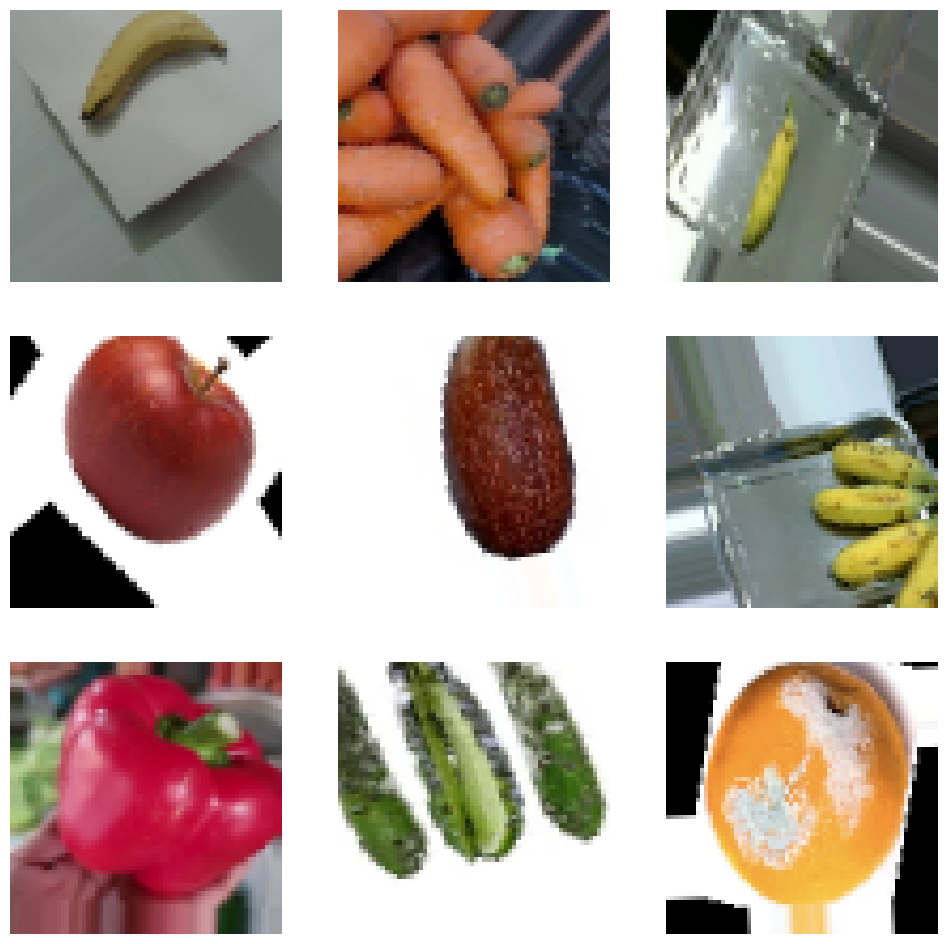

In [32]:
import matplotlib.pyplot as plt

# Imágenes del flujo de datos de entrenamiento
images, labels = next(train_data_flow)

# Mostrar algunas imágenes aumentadas
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

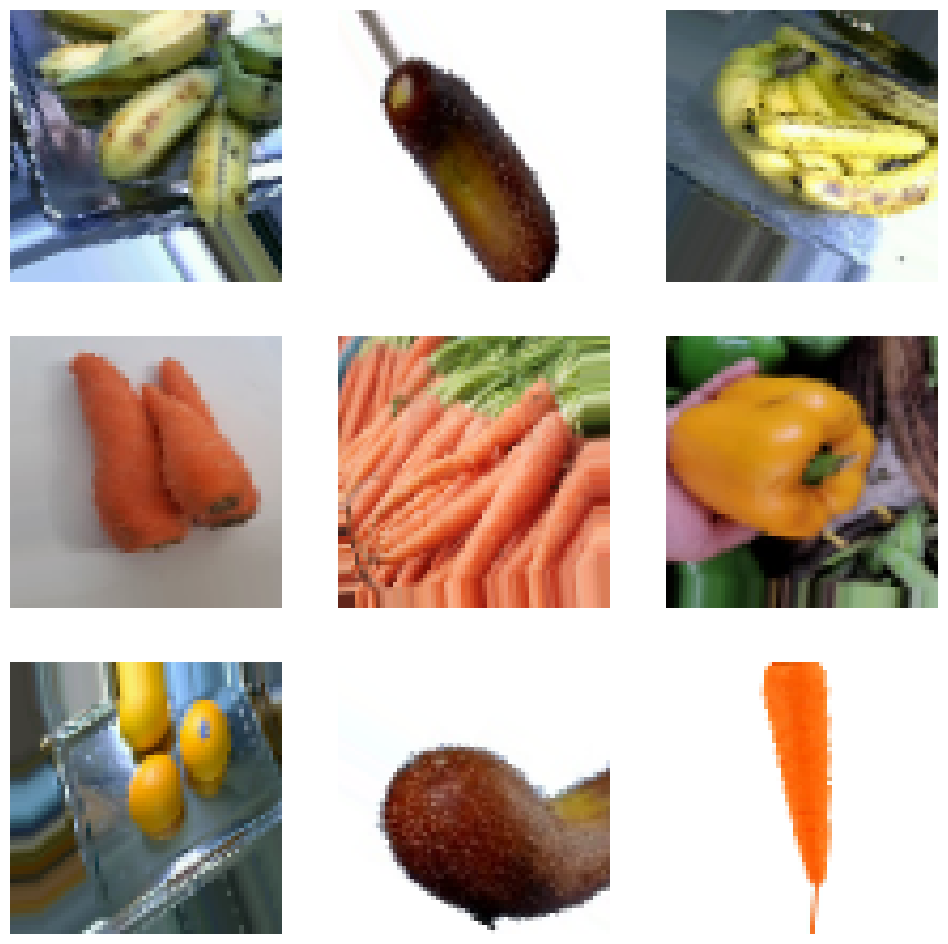

In [33]:
# Imágenes del flujo de datos de entrenamiento
images, labels = next(train_data_flow)

# Mostrar algunas imágenes aumentadas
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

# Parte 2: Diseño y Entrenamiento de la Red Neuronal Convolucional


### Arquitectura 1

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Definir la primera arquitectura de la CNN
cnn_model_1 = Sequential([
    Input(shape=(64, 64, 3)),  # Usar Input para definir la forma de entrada
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # 7 clases para las frutas y verduras seleccionadas
])

# Compilar el modelo
cnn_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
print(f"Number of validation batches: {len(test_data_flow)}")
print(f"Number of validation samples: {test_data_flow.samples}")

if test_data_flow.samples == 0:
    raise ValueError("El generador de datos de prueba no tiene suficientes datos. Verifica la estructura de los directorios de prueba.")

Number of validation batches: 27
Number of validation samples: 850


In [38]:
# Entrenar el modelo
history_1 = cnn_model_1.fit(
    train_data_flow,
    steps_per_epoch=train_data_flow.samples // train_data_flow.batch_size,
    epochs=10,
    validation_data=test_data_flow,
    validation_steps=test_data_flow.samples // test_data_flow.batch_size
)

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 45s 412ms/step - accuracy: 0.7148 - loss: 0.8246 - val_accuracy: 0.8594 - val_loss: 0.4839
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9062 - loss: 0.3692 - val_accuracy: 0.8889 - val_loss: 0.5695
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 84s 430ms/step - accuracy: 0.8023 - loss: 0.5970 - val_accuracy: 0.8582 - val_loss: 0.4452
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.7500 - loss: 0.6727 - val_accuracy: 1.0000 - val_loss: 0.1114
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 44s 407ms/step - accuracy: 0.8315 - loss: 0.4864 - val_accuracy: 0.8570 - val_loss: 0.4291
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.7188 - loss: 0.7216 - val_accuracy: 0.8333 - val_loss: 0.6228
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 81s 397ms/step - accuracy: 0.8623 - loss: 0.4090 - val_accuracy: 0.9062 - val_loss: 0.3248
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.9062 - loss: 0.418

In [39]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = cnn_model_1.evaluate(test_data_flow)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.8629 - loss: 0.4311
Test Accuracy: 0.8564705848693848
Test Loss: 0.4287702441215515


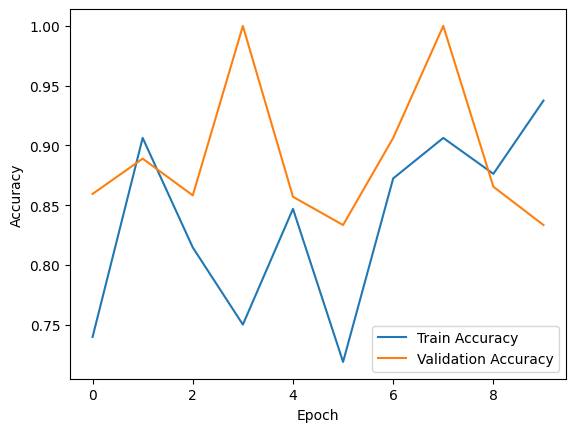

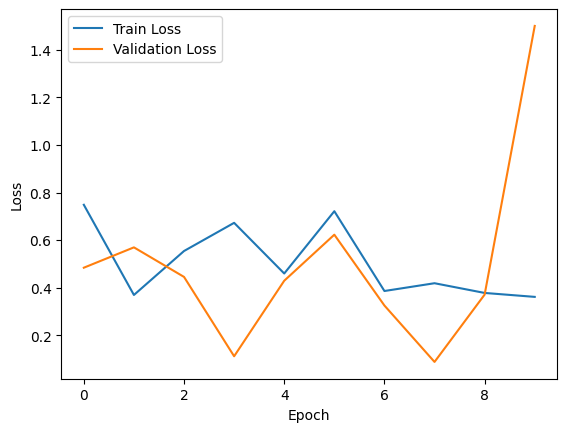

In [43]:
import matplotlib.pyplot as plt

# Visualizar precisión
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualizar pérdida
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
# Guardar el modelo en la misma carpeta que el archivo kaggle.json
cnn_model_1.save('/content/drive/MyDrive/Colab Notebooks/cnn_model_1.h5')

In [45]:
# Guardar el modelo en la misma carpeta que el archivo kaggle.json en el formato nativo de Keras
cnn_model_1.save('/content/drive/MyDrive/Colab Notebooks/cnn_model_1.keras')

### Definir y Entrenar las Otras Arquitecturas
Definir y entrenar dos arquitecturas adicionales para comparar su rendimiento.

### Arquitectura 2

In [46]:
# Definir la segunda arquitectura de la CNN
cnn_model_2 = Sequential([
    Input(shape=(64, 64, 3)),  # Imágenes RGB (a color)
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(7, activation='softmax')
])

# Compilar el modelo
cnn_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_2 = cnn_model_2.fit(
    train_data_flow,
    steps_per_epoch=train_data_flow.samples // train_data_flow.batch_size,
    epochs=10,
    validation_data=test_data_flow,
    validation_steps=test_data_flow.samples // test_data_flow.batch_size
)

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 91s 821ms/step - accuracy: 0.3877 - loss: 1.6203 - val_accuracy: 0.6683 - val_loss: 0.8691
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5625 - loss: 0.9966 - val_accuracy: 0.6111 - val_loss: 0.8369
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 136s 774ms/step - accuracy: 0.7271 - loss: 0.7660 - val_accuracy: 0.8474 - val_loss: 0.4943
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.8125 - loss: 0.5855 - val_accuracy: 0.8333 - val_loss: 0.4793
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 77s 717ms/step - accuracy: 0.7949 - loss: 0.5868 - val_accuracy: 0.8942 - val_loss: 0.3577
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8750 - loss: 0.4087 - val_accuracy: 1.0000 - val_loss: 0.2302
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 77s 716ms/step - accuracy: 0.8502 - loss: 0.4325 - val_accuracy: 0.8486 - val_loss: 0.4299
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.7812 - loss: 0.6855

In [49]:
# Guardar el modelo versión H5
cnn_model_2.save('/content/drive/MyDrive/Colab Notebooks/cnn_model_2.h5')

In [ ]:
# Guardar el modelo en formato nativo de Keras
cnn_model_2.save('/content/drive/MyDrive/Colab Notebooks/cnn_model_2.keras')

### Arquitectura 3

In [48]:
# Definir la tercera arquitectura de la CNN
cnn_model_3 = Sequential([
    Input(shape=(64, 64, 3)),  # Imágenes RGB (a color)
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
])

# Compilar el modelo
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_3 = cnn_model_3.fit(
    train_data_flow,
    steps_per_epoch=train_data_flow.samples // train_data_flow.batch_size,
    epochs=10,
    validation_data=test_data_flow,
    validation_steps=test_data_flow.samples // test_data_flow.batch_size
)

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 62s 527ms/step - accuracy: 0.3756 - loss: 1.5872 - val_accuracy: 0.6887 - val_loss: 0.8863
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.6875 - loss: 0.9552 - val_accuracy: 0.5556 - val_loss: 1.0921
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


106/106 ━━━━━━━━━━━━━━━━━━━━ 74s 465ms/step - accuracy: 0.6839 - loss: 0.8540 - val_accuracy: 0.7921 - val_loss: 0.6349
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5625 - loss: 0.9149 - val_accuracy: 0.8333 - val_loss: 0.3864
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 51s 467ms/step - accuracy: 0.7925 - loss: 0.5928 - val_accuracy: 0.8942 - val_loss: 0.3854
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8125 - loss: 0.5594 - val_accuracy: 0.8889 - val_loss: 0.4343
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 53s 477ms/step - accuracy: 0.8433 - loss: 0.4522 - val_accuracy: 0.8738 - val_loss: 0.4256
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - loss: 0.4603 - val_accuracy: 0.8333 - val_loss: 0.3118
Epoch 9/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 56s 506ms/step - accuracy: 0.8813 - loss: 0.3552 - val_accuracy: 0.9267 - val_loss: 0.2985
Epoch 10/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.8438 - loss: 0.2886 - val_accu

In [ ]:
# Guardar el modelo
cnn_model_3.save('/content/drive/MyDrive/Colab Notebooks/cnn_model_3.h5')

In [ ]:
# Guardar el modelo en formato nativo de Keras
cnn_model_3.save('/content/drive/MyDrive/Colab Notebooks/cnn_model_3.keras')

### Evaluar los Modelos 2 y 3

In [50]:
# Evaluar el modelo 2 en el conjunto de prueba
test_loss_2, test_accuracy_2 = cnn_model_2.evaluate(test_data_flow)
print(f"Test Accuracy (Model 2): {test_accuracy_2}")
print(f"Test Loss (Model 2): {test_loss_2}")

# Evaluar el modelo 3 en el conjunto de prueba
test_loss_3, test_accuracy_3 = cnn_model_3.evaluate(test_data_flow)
print(f"Test Accuracy (Model 3): {test_accuracy_3}")
print(f"Test Loss (Model 3): {test_loss_3}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.9256 - loss: 0.2607
Test Accuracy (Model 2): 0.9223529696464539
Test Loss (Model 2): 0.2694317698478699
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.9209 - loss: 0.3030
Test Accuracy (Model 3): 0.9235293865203857
Test Loss (Model 3): 0.3000439703464508


### Visualización del rendimiento de los Modelos

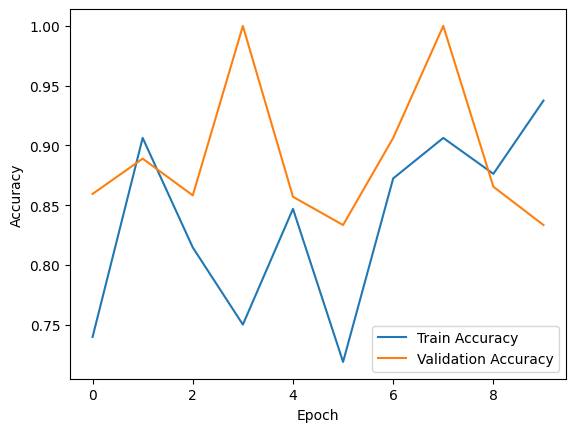

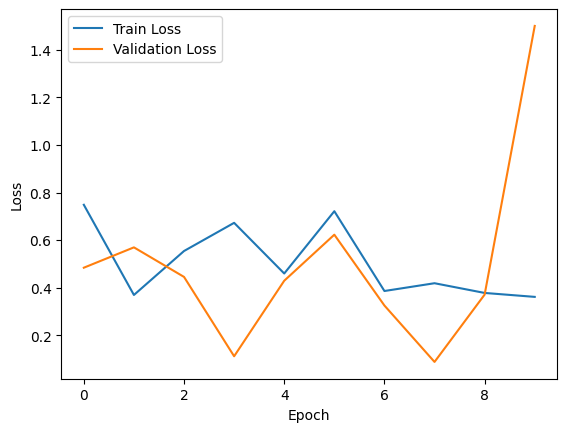

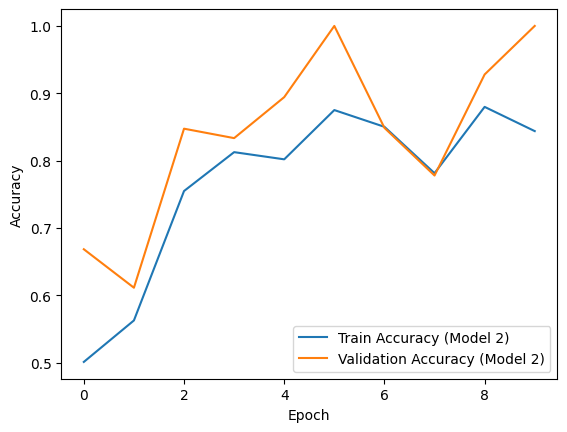

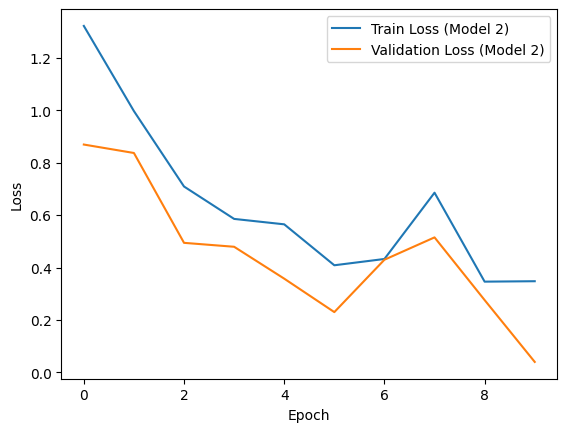

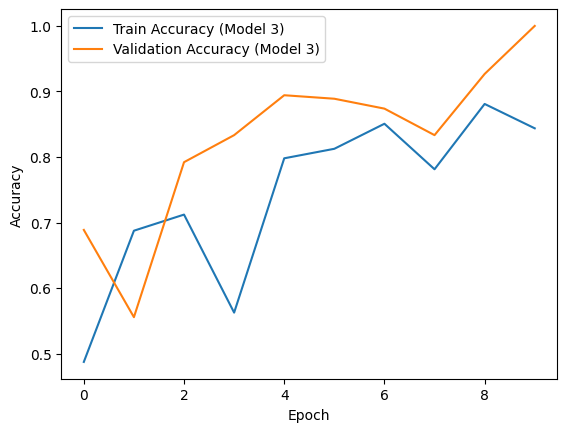

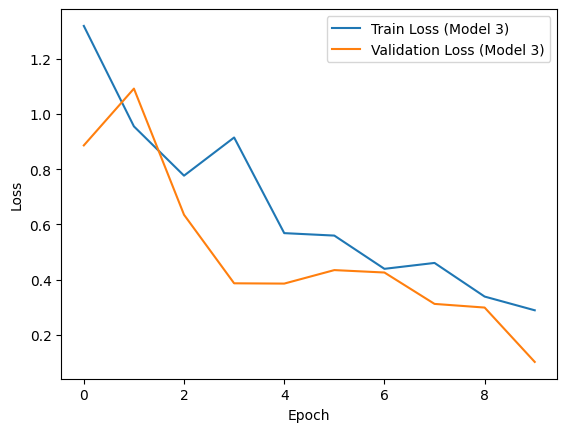

In [56]:
# Visualizar precisión
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualizar pérdida
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizar precisión para el modelo 2
plt.plot(history_2.history['accuracy'], label='Train Accuracy (Model 2)')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualizar pérdida para el modelo 2
plt.plot(history_2.history['loss'], label='Train Loss (Model 2)')
plt.plot(history_2.history['val_loss'], label='Validation Loss (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizar precisión para el modelo 3
plt.plot(history_3.history['accuracy'], label='Train Accuracy (Model 3)')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy (Model 3)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualizar pérdida para el modelo 3
plt.plot(history_3.history['loss'], label='Train Loss (Model 3)')
plt.plot(history_3.history['val_loss'], label='Validation Loss (Model 3)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Mejor Arquitectura**

Basándonos en los resultados de precisión y pérdida, parece que el Modelo 2 es la mejor opción. Aquí están las razones:

1. **Precisión:**
El Modelo 2 tiene una precisión de prueba de 0.9224, que es ligeramente inferior a la del Modelo 3 (0.9235), pero la diferencia es mínima.
2. **Pérdida:**
El Modelo 2 tiene una pérdida de prueba de 0.2694, que es significativamente menor que la del Modelo 3 (0.3000). Una menor pérdida indica que el modelo está haciendo mejores predicciones en general.
3. **Consistencia:**
El Modelo 2 muestra una buena consistencia entre la precisión y la pérdida, lo que sugiere que no está sobreajustado ni subajustado.

### Por qué cree que la CNN que seleccionó funciona mejor que otras?
El Modelo 2 parece ser la mejor opción debido a su equilibrio entre precisión y pérdida. Aunque el Modelo 3 tiene una precisión ligeramente superior, la diferencia en la pérdida es más significativa y favorece al Modelo 2.
Esto sugiere que el Modelo 2 es más robusto y generaliza mejor a datos no vistos.